In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from MCMC_visu import quantiles_to_plot,quantiles_to_plot_calibration

In [4]:
nb_mcmc = 1
nb_classe = 1
nb_compartiment = 7

In [5]:


CLASSE = []
QUANTILES = []

file_path = '../data/integration.csv'

for classe in range(nb_classe):
    # Initialisation des dictionnaires pour stocker les données
    data_S = {}
    data_I = {}
    data_R = {}
    data_Q = {}
    data_D = {}
    data_Q_entry = {}
    data_D_entry = {}

    CLASSE_temp = []
    CLASSE_temp.append(data_S)
    CLASSE_temp.append(data_I)
    CLASSE_temp.append(data_R)
    CLASSE_temp.append(data_Q)
    CLASSE_temp.append(data_D)
    CLASSE_temp.append(data_Q_entry)
    CLASSE_temp.append(data_D_entry)
    

    for i in range(nb_mcmc):
        file_path = '../data/integration.csv'
        # Lecture du fichier CSV
        df = pd.read_csv(file_path)
        
        # Stockage des colonnes dans les dictionnaires
        CLASSE_temp[0][i] = df.iloc[:,classe*nb_compartiment + 0]
        CLASSE_temp[1][i] = df.iloc[:,classe*nb_compartiment + 1]
        CLASSE_temp[2][i] = df.iloc[:,classe*nb_compartiment + 2]
        CLASSE_temp[3][i] = df.iloc[:,classe*nb_compartiment + 3]
        CLASSE_temp[4][i] = df.iloc[:,classe*nb_compartiment + 4]
        CLASSE_temp[5][i] = df.iloc[:,classe*nb_compartiment + 5]
        CLASSE_temp[6][i] = df.iloc[:,classe*nb_compartiment + 6]

    # Création des DataFrames finaux
    CLASSE_temp[0] = pd.DataFrame(CLASSE_temp[0]).transpose()*17282163
    CLASSE_temp[1] = pd.DataFrame(CLASSE_temp[1]).transpose()*17282163
    CLASSE_temp[2] = pd.DataFrame(CLASSE_temp[2]).transpose()*17282163
    CLASSE_temp[3] = pd.DataFrame(CLASSE_temp[3]).transpose()*17282163
    CLASSE_temp[4] = pd.DataFrame(CLASSE_temp[4]).transpose()*17282163
    CLASSE_temp[5] = pd.DataFrame(CLASSE_temp[5]).transpose()*17282163
    CLASSE_temp[6] = pd.DataFrame(CLASSE_temp[6]).transpose()*17282163





    QUANTILES_temp = []

    QUANTILES_temp.append(CLASSE_temp[0].quantile([0.05,0.5,0.95]))
    QUANTILES_temp.append(CLASSE_temp[1].quantile([0.05,0.5,0.95]))
    QUANTILES_temp.append(CLASSE_temp[2].quantile([0.05,0.5,0.95]))
    QUANTILES_temp.append(CLASSE_temp[3].quantile([0.05,0.5,0.95]))
    QUANTILES_temp.append(CLASSE_temp[4].quantile([0.05,0.5,0.95]))
    QUANTILES_temp.append(CLASSE_temp[5].quantile([0.05,0.5,0.95]))
    QUANTILES_temp.append(CLASSE_temp[6].quantile([0.05,0.5,0.95]))


    CLASSE.append(CLASSE_temp)
    QUANTILES.append(QUANTILES_temp)


#calcul du total

CLASSE_temp=CLASSE[0]
for classe in range(1,nb_classe):
    for comp in range(nb_compartiment):
            CLASSE_temp[comp] = CLASSE_temp[comp] + CLASSE[classe][comp]



QUANTILES_temp = []
QUANTILES_temp.append(CLASSE_temp[0].quantile([0.05,0.5,0.95]))
QUANTILES_temp.append(CLASSE_temp[1].quantile([0.05,0.5,0.95]))
QUANTILES_temp.append(CLASSE_temp[2].quantile([0.05,0.5,0.95]))
QUANTILES_temp.append(CLASSE_temp[3].quantile([0.05,0.5,0.95]))
QUANTILES_temp.append(CLASSE_temp[4].quantile([0.05,0.5,0.95]))
QUANTILES_temp.append(CLASSE_temp[5].quantile([0.05,0.5,0.95]))
QUANTILES_temp.append(CLASSE_temp[6].quantile([0.05,0.5,0.95]))

QUANTILES.append(QUANTILES_temp)
CLASSE.append(CLASSE_temp)

print(CLASSE)
print(QUANTILES)





[[            0             1             2             3             4    \
0  1.726364e+07  1.726061e+07  1.725734e+07  1.725374e+07  1.724974e+07   

            5             6             7             8             9    ...  \
0  1.724522e+07  1.724013e+07  1.723434e+07  1.722768e+07  1.722011e+07  ...   

            340           341           342           343           344  \
0  1.531983e+07  1.531916e+07  1.531851e+07  1.531785e+07  1.531720e+07   

            345           346           347           348           349  
0  1.531657e+07  1.531592e+07  1.531527e+07  1.531463e+07  1.531401e+07  

[1 rows x 350 columns],             0             1             2            3             4    \
0  18508.462081  17473.478273  17006.818394  16965.53822  17262.371467   

            5             6             7             8             9    ...  \
0  17847.918801  18698.735239  19809.831422  21189.745947  22857.467763  ...   

            340           341           342         

/tmp/ipykernel_9411/1242695235.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig1.show()


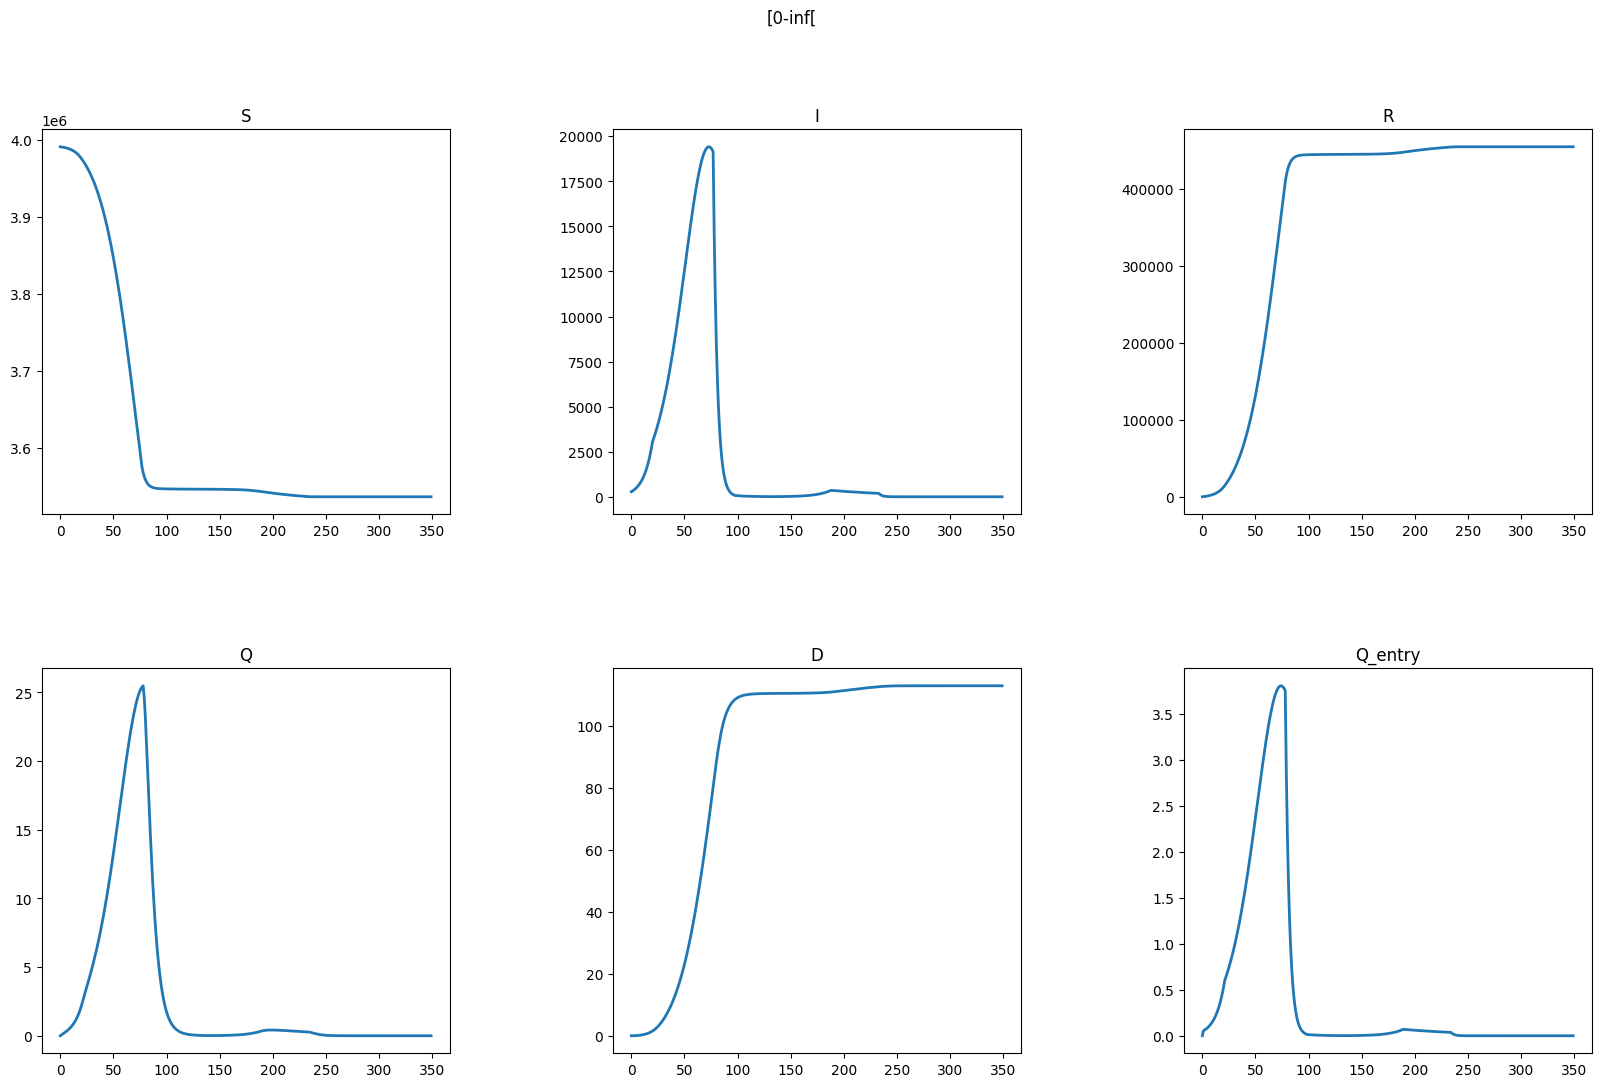

In [6]:

x = range(350)
fig1, ax = plt.subplots(nrows=2,ncols=3,figsize=(20, 12))
quantiles_to_plot(x,QUANTILES,0,0,ax[0][0],"S")
quantiles_to_plot(x,QUANTILES,0,1,ax[0][1],"I")
quantiles_to_plot(x,QUANTILES,0,2,ax[0][2],"R")
quantiles_to_plot(x,QUANTILES,0,3,ax[1][0],"Q")
quantiles_to_plot(x,QUANTILES,0,4,ax[1][1],"D")
quantiles_to_plot(x,QUANTILES,0,5,ax[1][2],"Q_entry")
fig1.suptitle("[0-inf[")
fig1.subplots_adjust(wspace=0.4, hspace=0.4)
fig1.show()

/tmp/ipykernel_16948/888385741.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig3.show()


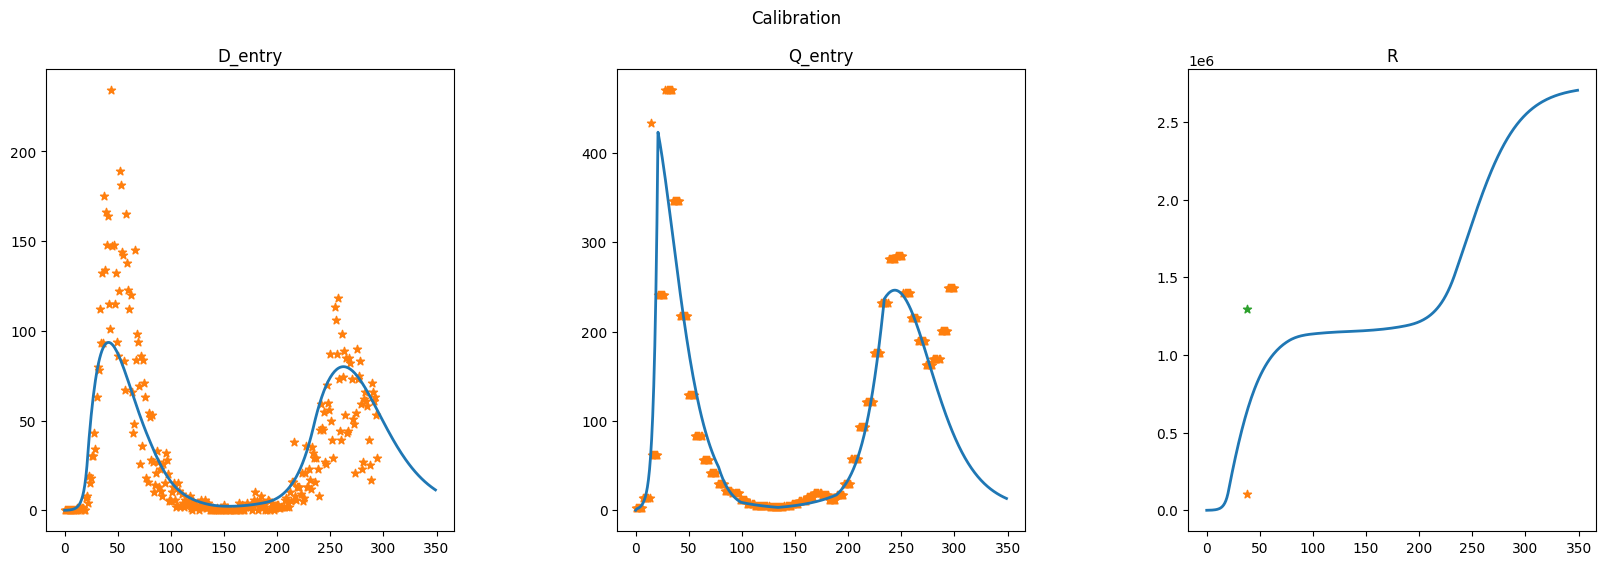

In [5]:
death_calibration = pd.read_csv('../data/DATA_calibration/1_classe/death_1.csv')
hosp_calibration = pd.read_csv('../data/DATA_calibration/1_classe/hosp_1.csv')

x = range(350)
fig3, ax = plt.subplots(nrows=1,ncols=3,figsize=(20, 6))

quantiles_to_plot_calibration(x,QUANTILES,0,6,ax[0],"D_entry",death_calibration['total'],0,0,0)
quantiles_to_plot_calibration(x,QUANTILES,0,5,ax[1],"Q_entry",hosp_calibration['total'],0,0,0)
quantiles_to_plot_calibration(x,QUANTILES,0,2,ax[2],"R",hosp_calibration['total'],1,0.006,0.075)


fig3.suptitle("Calibration")
fig3.subplots_adjust(wspace=0.4, hspace=0.4)
fig3.show()




In [16]:


CLASSE = []
QUANTILES = []



for classe in range(nb_classe):
    # Initialisation des dictionnaires pour stocker les données
    data_S = {}
    data_I = {}
    data_R = {}
    data_Q = {}
    data_D = {}
    data_Q_entry = {}
    data_D_entry = {}

    CLASSE_temp = []
    CLASSE_temp.append(data_S)
    CLASSE_temp.append(data_I)
    CLASSE_temp.append(data_R)
    CLASSE_temp.append(data_Q)
    CLASSE_temp.append(data_D)
    CLASSE_temp.append(data_Q_entry)
    CLASSE_temp.append(data_D_entry)
    

    for i in range(1):
        file_path = '../data/integration' + '.csv'
        # Lecture du fichier CSV
        df = pd.read_csv(file_path)
        
        # Stockage des colonnes dans les dictionnaires
        CLASSE_temp[0][i] = df.iloc[:,classe*nb_compartiment + 0]
        CLASSE_temp[1][i] = df.iloc[:,classe*nb_compartiment + 1]
        CLASSE_temp[2][i] = df.iloc[:,classe*nb_compartiment + 2]
        CLASSE_temp[3][i] = df.iloc[:,classe*nb_compartiment + 3]
        CLASSE_temp[4][i] = df.iloc[:,classe*nb_compartiment + 4]
        CLASSE_temp[5][i] = df.iloc[:,classe*nb_compartiment + 5]
        CLASSE_temp[6][i] = df.iloc[:,classe*nb_compartiment + 6]

    # Création des DataFrames finaux
    CLASSE_temp[0] = pd.DataFrame(CLASSE_temp[0]).transpose()*17282163
    CLASSE_temp[1] = pd.DataFrame(CLASSE_temp[1]).transpose()*17282163
    CLASSE_temp[2] = pd.DataFrame(CLASSE_temp[2]).transpose()*17282163
    CLASSE_temp[3] = pd.DataFrame(CLASSE_temp[3]).transpose()*17282163
    CLASSE_temp[4] = pd.DataFrame(CLASSE_temp[4]).transpose()*17282163
    CLASSE_temp[5] = pd.DataFrame(CLASSE_temp[5]).transpose()*17282163
    CLASSE_temp[6] = pd.DataFrame(CLASSE_temp[6]).transpose()*17282163





    QUANTILES_temp = []

    QUANTILES_temp.append(CLASSE_temp[0].quantile([0.05,0.5,0.95]))
    QUANTILES_temp.append(CLASSE_temp[1].quantile([0.05,0.5,0.95]))
    QUANTILES_temp.append(CLASSE_temp[2].quantile([0.05,0.5,0.95]))
    QUANTILES_temp.append(CLASSE_temp[3].quantile([0.05,0.5,0.95]))
    QUANTILES_temp.append(CLASSE_temp[4].quantile([0.05,0.5,0.95]))
    QUANTILES_temp.append(CLASSE_temp[5].quantile([0.05,0.5,0.95]))
    QUANTILES_temp.append(CLASSE_temp[6].quantile([0.05,0.5,0.95]))


    CLASSE.append(CLASSE_temp)
    QUANTILES.append(QUANTILES_temp)


#calcul du total

CLASSE_temp=CLASSE[0]
for classe in range(1,nb_classe):
    for comp in range(nb_compartiment):
            CLASSE_temp[comp] = CLASSE_temp[comp] + CLASSE[classe][comp]



QUANTILES_temp = []
QUANTILES_temp.append(CLASSE_temp[0].quantile([0.05,0.5,0.95]))
QUANTILES_temp.append(CLASSE_temp[1].quantile([0.05,0.5,0.95]))
QUANTILES_temp.append(CLASSE_temp[2].quantile([0.05,0.5,0.95]))
QUANTILES_temp.append(CLASSE_temp[3].quantile([0.05,0.5,0.95]))
QUANTILES_temp.append(CLASSE_temp[4].quantile([0.05,0.5,0.95]))
QUANTILES_temp.append(CLASSE_temp[5].quantile([0.05,0.5,0.95]))
QUANTILES_temp.append(CLASSE_temp[6].quantile([0.05,0.5,0.95]))

QUANTILES.append(QUANTILES_temp)
CLASSE.append(CLASSE_temp)


In [17]:
file_path = '../data/save_dir/save_SIRQD_2classe_mads.csv'
parametres_mads = pd.read_csv(file_path)

print(parametres_mads.transpose())

quantiles = parametres.quantile([0.25, 0.5, 0.75])
print(quantiles.transpose())




FileNotFoundError: [Errno 2] No such file or directory: '../data/save_dir/save_SIRQD_2classe_mads.csv'

/tmp/ipykernel_16580/1284647377.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig1.show()


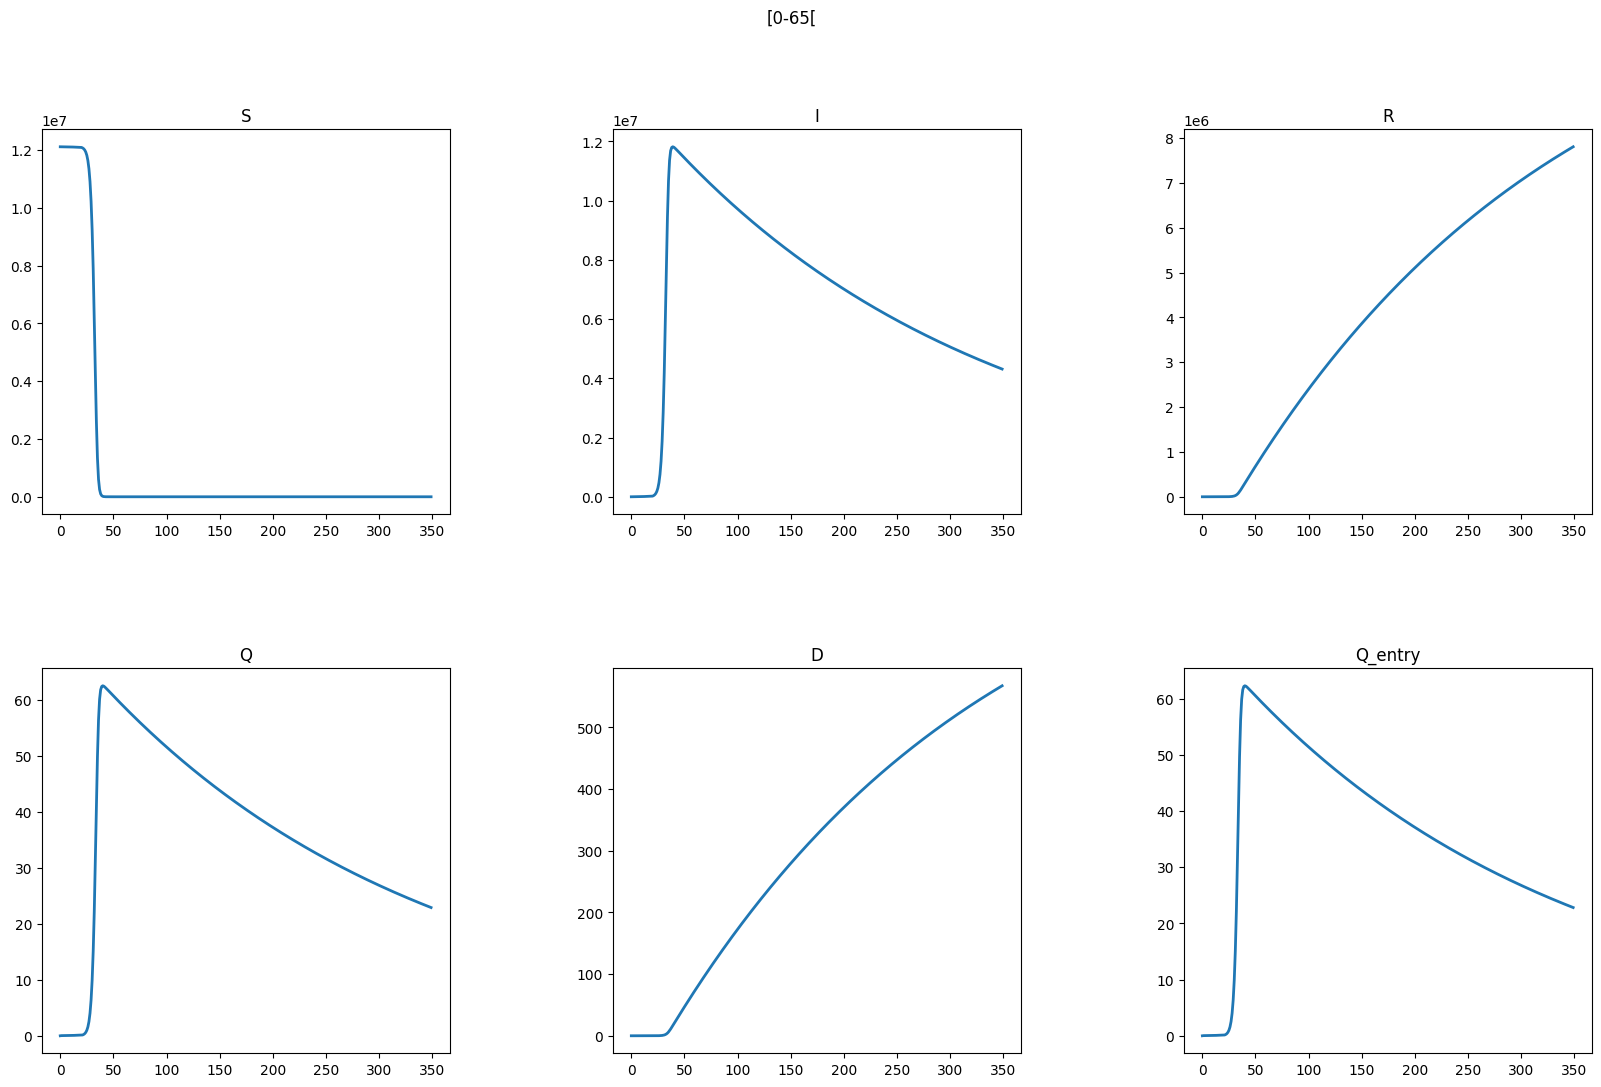

In [33]:
x = range(350)
fig1, ax = plt.subplots(nrows=2,ncols=3,figsize=(20, 12))
quantiles_to_plot(x,QUANTILES,0,0,ax[0][0],"S")
quantiles_to_plot(x,QUANTILES,0,1,ax[0][1],"I")
quantiles_to_plot(x,QUANTILES,0,2,ax[0][2],"R")
quantiles_to_plot(x,QUANTILES,0,3,ax[1][0],"Q")
quantiles_to_plot(x,QUANTILES,0,4,ax[1][1],"D")
quantiles_to_plot(x,QUANTILES,0,5,ax[1][2],"Q_entry")
fig1.suptitle("[0-65[")
fig1.subplots_adjust(wspace=0.4, hspace=0.4)
fig1.show()

/tmp/ipykernel_16580/3039041559.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig2.show()


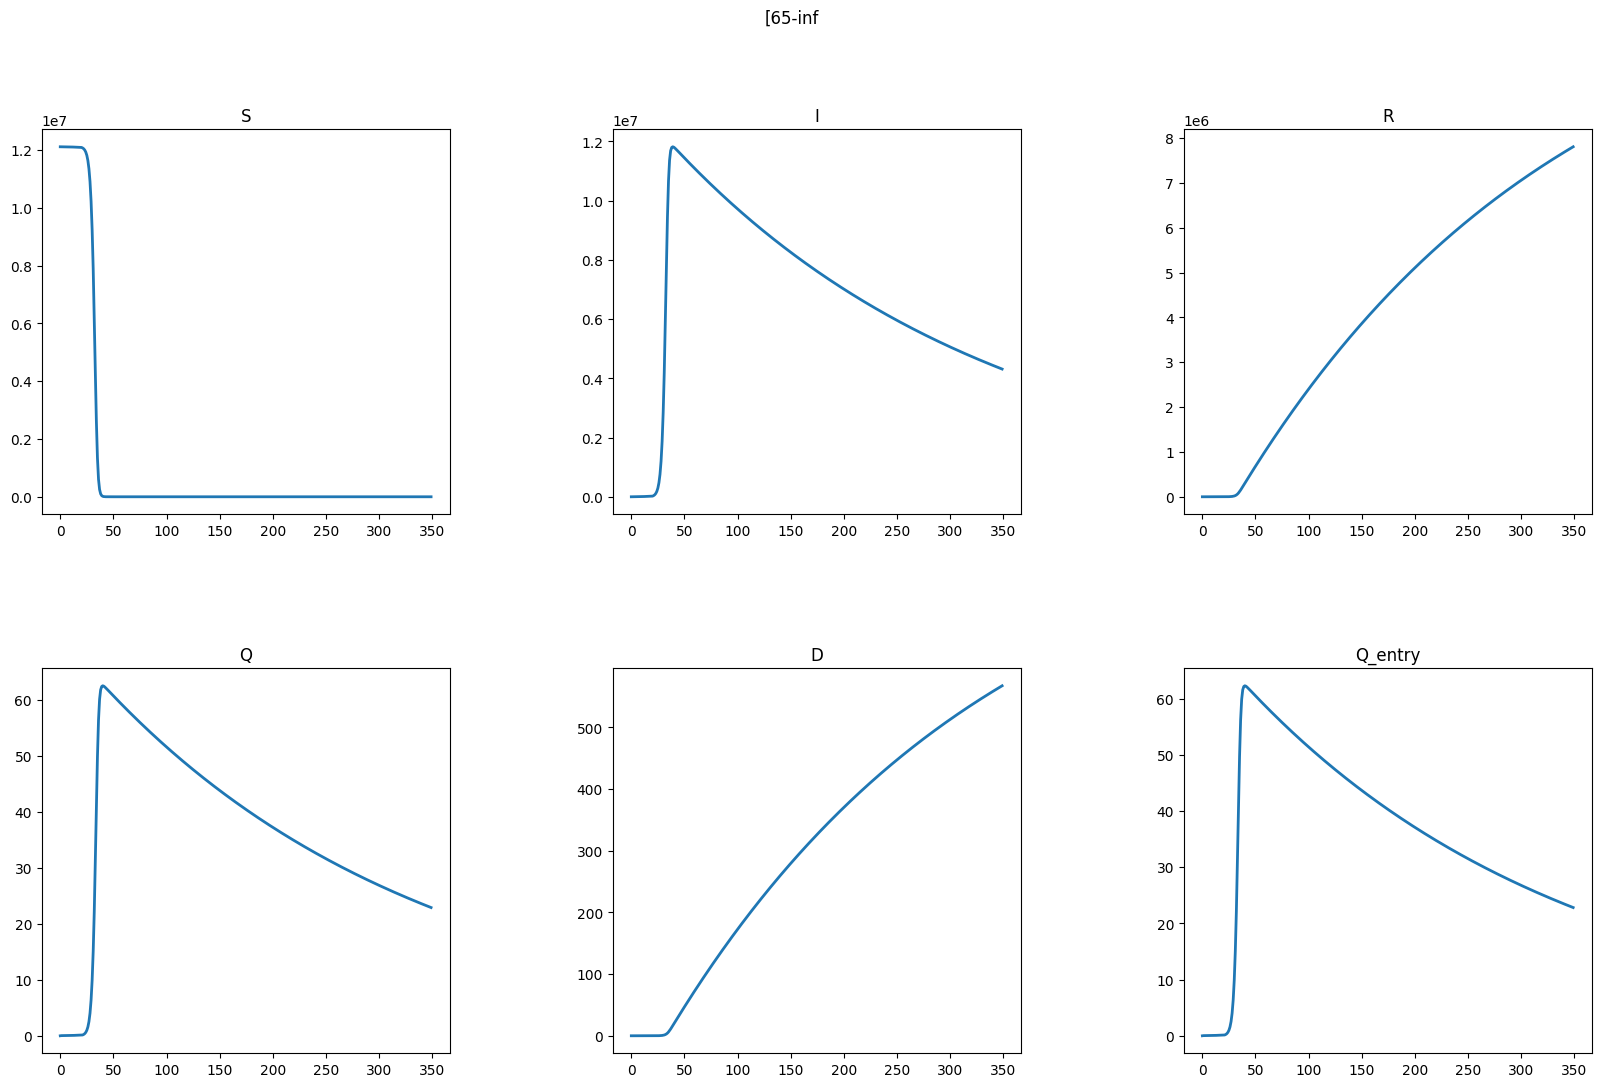

In [34]:
x = range(350)
fig2, ax = plt.subplots(nrows=2,ncols=3,figsize=(20, 12))
quantiles_to_plot(x,QUANTILES,1,0,ax[0][0],"S")
quantiles_to_plot(x,QUANTILES,1,1,ax[0][1],"I")
quantiles_to_plot(x,QUANTILES,1,2,ax[0][2],"R")
quantiles_to_plot(x,QUANTILES,1,3,ax[1][0],"Q")
quantiles_to_plot(x,QUANTILES,1,4,ax[1][1],"D")
quantiles_to_plot(x,QUANTILES,1,5,ax[1][2],"Q_entry")
fig2.suptitle("[65-inf")
fig2.subplots_adjust(wspace=0.4, hspace=0.4)
fig2.show()

In [35]:
death_calibration = pd.read_csv('../data/DATA_calibration/0-65_65-inf/day_death_csv_0-65_65-inf.csv')
hosp_calibration = pd.read_csv('../data/DATA_calibration/0-65_65-inf/day_hosp_csv_0-65_65-inf.csv')

x = range(350)
fig3, ax = plt.subplots(nrows=3,ncols=3,figsize=(20, 12))
quantiles_to_plot_calibration(x,QUANTILES,0,6,ax[0][0],"D_entry",death_calibration['0-65'],0,0,0)
quantiles_to_plot_calibration(x,QUANTILES,0,5,ax[0][1],"Q_entry",hosp_calibration['0-65'],0,0,0)
quantiles_to_plot_calibration(x,QUANTILES,0,2,ax[0][2],"Q_entry",hosp_calibration['0-65'],1,0.006,0.075)

quantiles_to_plot_calibration(x,QUANTILES,1,6,ax[1][0],"D_entry",death_calibration['65-inf'],0,0,0)
quantiles_to_plot_calibration(x,QUANTILES,1,5,ax[1][1],"Q_entry",hosp_calibration['65-inf'],0,0,0)
quantiles_to_plot_calibration(x,QUANTILES,1,2,ax[1][2],"R",hosp_calibration['65-inf'],1,0.012,0.051)

quantiles_to_plot_calibration(x,QUANTILES,2,6,ax[2][0],"D_entry",death_calibration['all'],0,0,0)
quantiles_to_plot_calibration(x,QUANTILES,2,5,ax[2][1],"Q_entry",hosp_calibration['all'],0,0,0)
quantiles_to_plot_calibration(x,QUANTILES,2,2,ax[2][2],"R",hosp_calibration['all'],1,0.021,0.037)

fig3.suptitle("Calibration")
fig3.subplots_adjust(wspace=0.4, hspace=0.4)
fig3.show()

FileNotFoundError: [Errno 2] No such file or directory: '../data/DATA_calibration/0-65_65-inf/day_death_csv_0-65_65-inf.csv'